Dataset link : <a href = "https://www.kaggle.com/datasets/nipunarora8/age-gender-and-ethnicity-face-data-csv">Click here</a>

In [253]:
import zipfile
import pandas as pd
import numpy as np
import joblib
import math

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import Callback

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score



In [2]:
tensorflow.__version__

'2.8.2'

In [5]:
zip = zipfile.ZipFile('data.zip', 'r')
zip.extractall()
zip.close()

In [7]:
df = pd.read_csv('age_gender.csv')

In [8]:
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [9]:
df['age'].unique()

array([  1,  10, 100, 101, 103, 105,  11, 110, 111, 115, 116,  12,  13,
        14,  15,  16,  17,  18,  19,   2,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,   3,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,   4,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
         5,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,   6,  60,
        61,  62,  63,  64,  65,  66,  67,  68,  69,   7,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,   8,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,   9,  90,  91,  92,  93,  95,  96,  99])

In [93]:
df.shape

(23705, 6)

In [11]:
## 1 > Female
## 0 > Male
df['gender'].unique()

array([0, 1])

In [18]:
len(df['pixels'].iloc[0])

8917

In [21]:
df['pixels'].iloc[2]

'67 70 71 70 69 67 70 79 90 103 116 132 145 155 161 166 169 175 177 178 179 180 183 186 187 188 192 194 198 203 206 213 214 216 220 219 215 213 211 211 210 207 206 203 200 197 194 192 65 66 69 70 70 69 72 83 88 100 112 125 139 155 159 165 167 170 174 176 178 177 180 185 186 187 190 193 195 197 201 207 208 212 215 215 215 213 211 211 210 207 204 201 200 197 194 192 61 63 69 71 70 70 72 81 87 100 113 123 137 149 153 158 164 166 171 173 173 174 182 185 184 188 190 191 189 192 197 201 204 210 213 212 211 211 208 209 208 206 204 199 199 197 194 190 56 62 69 71 72 72 73 80 88 103 114 124 134 147 152 156 160 161 162 164 167 169 171 179 183 186 188 188 185 186 188 196 202 206 206 208 208 201 203 205 206 205 202 196 198 198 193 191 62 61 72 72 72 72 74 78 82 94 110 120 133 148 157 161 158 160 158 162 165 165 167 174 180 183 186 184 182 183 185 192 200 200 199 197 195 192 194 201 207 208 204 202 201 200 195 193 62 64 74 74 73 70 69 70 74 83 91 104 120 140 150 162 160 157 156 156 159 165 174 175 

In [24]:
## Let's change the string pixel array into float array
np.array(df['pixels'].iloc[2].split(), dtype = 'float32')

(2304,)

In [115]:
df['pix'] = df['pixels'].apply( lambda x : x.split())

In [117]:
## Taking image as square shape 
import math

size = int(math.sqrt(len(df['pix'].iloc[0])))
shape = (size, size)
print("Image shape is {} x {}".format(size, size))

Image shape is 48 x 48


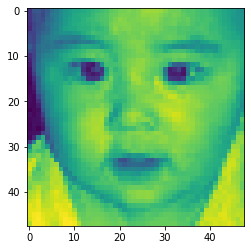

In [121]:
plt.imshow(np.array(df['pix'].iloc[23], dtype='float32').reshape(shape))

In [122]:
## Here 48 x 48 is correct shape of image

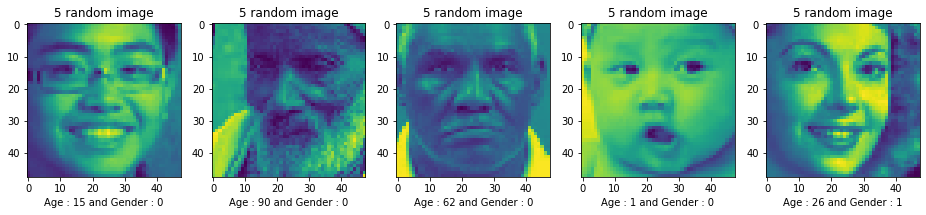

In [124]:
## Now plotting 5 random image here
i = 0
plt.figure(figsize=(16, 6))
for d in df.sample(5).values:
    plt.subplot(1, 5, i+1)
    i += 1
    plt.imshow(np.array(d[-1], dtype='float32').reshape(shape))
    plt.xlabel("Age : {} and Gender : {}".format(d[0], d[2]))
    plt.title("5 random image")
plt.show()

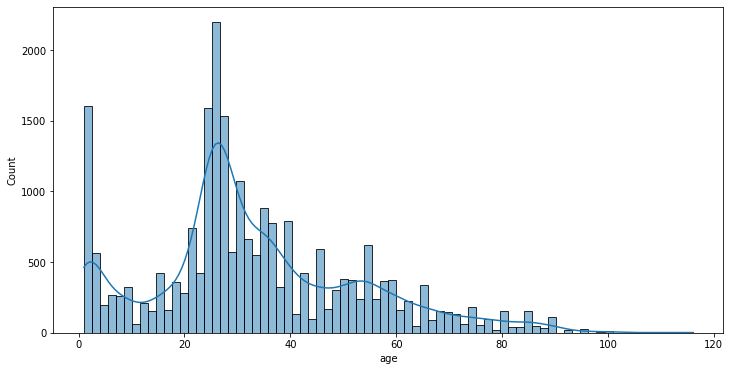

In [125]:
## Let's do some distribution 
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], kde = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


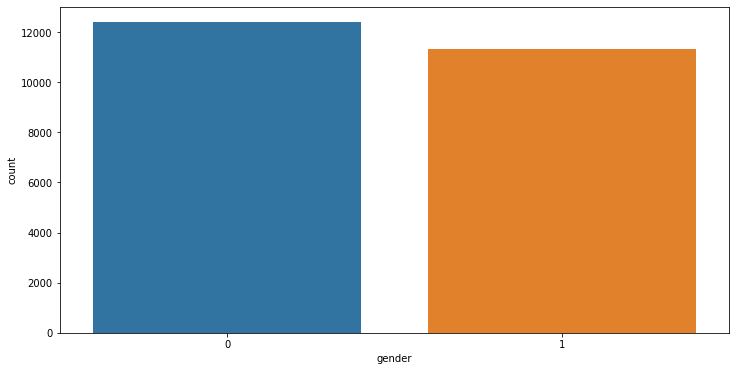

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(df['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


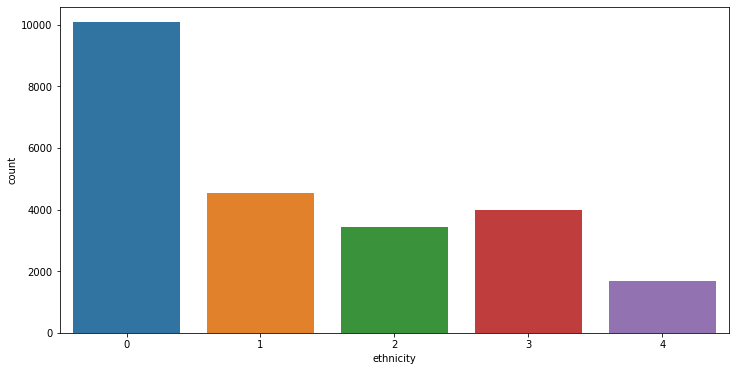

In [69]:
plt.figure(figsize=(12, 6))
sns.countplot(df['ethnicity'])

# Creating Gender Model

In [180]:
## Splitting data into train and test set

X = df['pix']
y = df['gender']

In [181]:
## Reshaping the input data as convolutional layer need chanel too.

first = True
x = []
for i in X:
    x.append(np.array(i, dtype = 'float32'))
X = np.array(x).reshape((-1, 48, 48, 1))

In [182]:
X.shape

(23705, 48, 48, 1)

In [183]:
## splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [184]:
## Creating the imagedata generator

BATCH_SIZE = 64
STEPS_PER_EPOCHS = int(len(X_train)/BATCH_SIZE)
VALIDATION_STEPS = int(len(X_test)/BATCH_SIZE)

train_gen = image.ImageDataGenerator(
    rescale = 1.0/255.0,
    horizontal_flip=True,
    zoom_range=0.2
)

test_gen = image.ImageDataGenerator(rescale = 1.0/255.0)

In [185]:
## Flowing the train set into image generator
train_set = train_gen.flow(X_train, y_train, batch_size = BATCH_SIZE)
test_set = test_gen.flow(X_test, y_test, batch_size=BATCH_SIZE)

In [193]:
## Now Creating the gender model

gen_model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(48, 48, 1), padding = 'same', activation='relu'),
    layers.Conv2D(32, (3, 3), padding = 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 

    layers.Conv2D(64, (3, 3), padding = 'same', activation= 'relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), padding = 'same', activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

gen_model.compile(optimizer = 'adam', 
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])
gen_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 conv2d_20 (Conv2D)          (None, 48, 48, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 12, 12, 64)      

In [194]:
gen_history = gen_model.fit(train_set,
              steps_per_epoch=STEPS_PER_EPOCHS,
              epochs = 20,
              validation_data=test_set,
              validation_steps = VALIDATION_STEPS)

Epoch 1/20
296/296 [==============================] - 10s 30ms/step - loss: 0.5186 - accuracy: 0.7446 - val_loss: 0.4967 - val_accuracy: 0.8418
Epoch 2/20
296/296 [==============================] - 7s 24ms/step - loss: 0.3694 - accuracy: 0.8297 - val_loss: 0.3294 - val_accuracy: 0.8602
Epoch 3/20
296/296 [==============================] - 8s 26ms/step - loss: 0.3319 - accuracy: 0.8514 - val_loss: 0.2930 - val_accuracy: 0.8708
Epoch 4/20
296/296 [==============================] - 7s 25ms/step - loss: 0.3047 - accuracy: 0.8642 - val_loss: 0.2763 - val_accuracy: 0.8765
Epoch 5/20
296/296 [==============================] - 7s 25ms/step - loss: 0.2976 - accuracy: 0.8722 - val_loss: 0.2688 - val_accuracy: 0.8843
Epoch 6/20
296/296 [==============================] - 7s 24ms/step - loss: 0.2807 - accuracy: 0.8749 - val_loss: 0.2713 - val_accuracy: 0.8813
Epoch 7/20
296/296 [==============================] - 7s 24ms/step - loss: 0.2694 - accuracy: 0.8838 - val_loss: 0.3063 - val_accuracy: 0.861

In [195]:
def check_model(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['accuracy', 'val_accuracy'])
    plt.title("Accuracy score")
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.title("Loss score")
    plt.show()


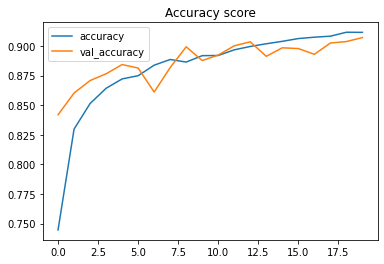

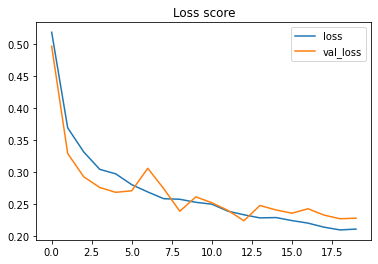

In [196]:
check_model(gen_history)

In [198]:
## Saving the model in file
joblib.dump(gen_model, open('gender_model.pkl', 'wb'))
print("Done")

INFO:tensorflow:Assets written to: ram://a3369561-bbc6-40ba-98c4-847e25d9e3d4/assets
Done


In [221]:
model = joblib.load(open('gender_model.pkl','rb'))
# np.expand_dims(X_test[0], 0).shape ## Shape of new image to be tested
print(model.predict(np.expand_dims(X_test[2], 0)))
y_test.head()

[[0.]]


16899    0
335      0
13720    0
9100     1
4630     1
Name: gender, dtype: int64

# **`Now Creating the Age model`**

In [238]:
age_model = models.Sequential([
    layers.Conv2D(64, (3, 3), input_shape=(48, 48, 1), padding = 'same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)), 
    layers.Dropout(0.2),

    layers.Conv2D(128, (3, 3), padding = 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), padding = 'same', activation= 'relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),

    layers.Conv2D(256, (3, 3), padding = 'same', activation= 'relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),
    
    layers.Flatten(),
    layers.Dense(512, activation = 'relu'),
    layers.Dense(256, activation = 'relu'),
    layers.Dense(1, activation = 'relu')
])

age_model.compile(optimizer = 'adam',
                  loss = 'mean_squared_error',
                  metrics = ['mae'])
age_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_14 (Bat  (None, 48, 48, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 24, 24, 64)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 24, 24, 128)       73856     
                                                                 
 batch_normalization_15 (Bat  (None, 24, 24, 128)    

In [239]:
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [240]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
            self.model.save("model_{}.hd5".format(epoch))

In [241]:
age_history = age_model.fit(X_train, y_train,
          validation_split = 0.2, 
          batch_size = 32,
          epochs = 25,
          callbacks = [MyCallback()])

Epoch 1/25
475/475 [==============================] - 9s 17ms/step - loss: 230.5667 - mae: 11.1963 - val_loss: 370.7558 - val_mae: 14.0030
Epoch 2/25
475/475 [==============================] - 8s 17ms/step - loss: 143.0938 - mae: 8.7918 - val_loss: 271.2920 - val_mae: 13.2107
Epoch 3/25
475/475 [==============================] - 9s 19ms/step - loss: 121.1116 - mae: 8.0746 - val_loss: 591.6434 - val_mae: 19.2998
Epoch 4/25
475/475 [==============================] - 8s 17ms/step - loss: 112.6622 - mae: 7.7782 - val_loss: 287.1700 - val_mae: 12.4271
Epoch 5/25
475/475 [==============================] - 8s 16ms/step - loss: 103.6276 - mae: 7.4348 - val_loss: 489.3066 - val_mae: 17.9088
Epoch 6/25
475/475 [==============================] - 8s 16ms/step - loss: 92.2335 - mae: 7.0381 - val_loss: 118.6277 - val_mae: 7.5645
Epoch 7/25
475/475 [==============================] - 9s 19ms/step - loss: 88.0874 - mae: 6.8555 - val_loss: 233.6852 - val_mae: 11.8390
Epoch 8/25
475/475 [================

In [243]:
def check_reg_model(history):
    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.legend(['mae', 'val_mae'])
    plt.title("Mean Sqared score")
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['loss', 'val_loss'])
    plt.title("Loss score")
    plt.show()

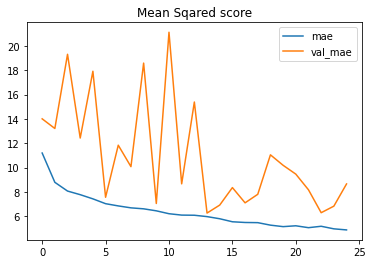

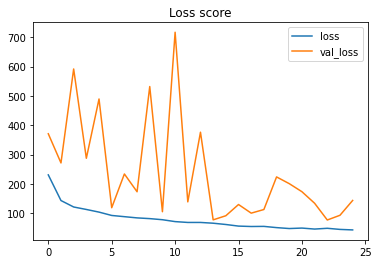

In [244]:
check_reg_model(age_history)

In [247]:
## Here it seems that 23rd epochs model is best model
## SO i will load and check the error

md = models.load_model('model_22.hd5')

In [251]:
pred = md.predict(X_test)

In [252]:
print(math.sqrt(mean_squared_error(pred, y_test)))

8.846451946282729
